<a href="https://colab.research.google.com/github/SirivellaAnjani/Airline-Performance-Dashboard/blob/main/House_Prices_Prediction_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices Prediction Using TensorFlow**

# Abstract

The purpose of this notebook is to create a machine learning model that can accurately predict the sale price of houses in King County, Washington. In order to achieve this goal, regression techniques will be implemented to analyze a dataset containing house sale prices between May 2014 and May 2015. Additionally, k-cross fold validation will be utilized to ensure that the model produces reliable and accurate predictions. By developing a machine learning model capable of accurately predicting house sale prices, this project aims to provide valuable insights to home buyers and sellers in the King County area, and also serves as a useful tool for real estate professionals</body></div>

# 1. Data Description

There are 80 variables available for the prediction model to leverage. The variable I am trying to predict is called Label and the input variables for the mcahine learning model are called Features.

**Label**

SalePrice - the property's sale price in dollars.

**Features**

There are <em>79 features</em>. The complete details about every variable can be found in <a target=_blank href="https://github.com/SirivellaAnjani/House-Prices-Prediction/blob/1e6bc8b45a2561fbc60766d8805df6f33f4952e8/data/data_description.txt">Data Description</a> text. 
Here is a brief description of each input variable:


    
| Input Variable | Description                                                    |
|:---------------|:---------------------------------------------------------------|
| MSSubClass     |  The building class                                            |
| MSZoning       |  The general zoning classification                             |
| LotFrontage    |  Linear feet of street connected to   property                 |
| LotArea        |  Lot size in square feet                                       |
| Street         |  Type of road access                                           |
| Alley          |  Type of alley access                                          |
| LotShape       |  General shape of property                                     |
| LandContour    |  Flatness of the property                                      |
| Utilities      |  Type of utilities available                                   |
| LotConfig      |  Lot configuration                                             |
| LandSlope      |  Slope of property                                             |
| Neighborhood   |  Physical locations within Ames   city limits                  |
| Condition1     |  Proximity to main road or railroad                            |
| Condition2     |  Proximity to main road or railroad   (if a second is present) |
| BldgType       |  Type of dwelling                                              |
| HouseStyle     |  Style of dwelling                                             |
| OverallQual    |  Overall material and finish   quality                         |
| OverallCond    |  Overall condition rating                                      |
| YearBuilt      |  Original construction date                                    |
| YearRemodAdd   |  Remodel date                                                  |
| RoofStyle      |  Type of roof                                                  |
| RoofMatl       |  Roof material                                                 |
| Exterior1st    |  Exterior covering on house                                    |
| Exterior2nd    |  Exterior covering on house (if   more than one material)      |
| MasVnrType     |  Masonry veneer type                                           |
| MasVnrArea     |  Masonry veneer area in square feet                            |
| ExterQual      |  Exterior material quality                                     |
| ExterCond      |  Present condition of the material   on the exterior           |
| Foundation     |  Type of foundation                                            |
| BsmtQual       |  Height of the basement                                        |
| BsmtCond       |  General condition of the basement                             |
| BsmtExposure   |  Walkout or garden level basement   walls                      |
| BsmtFinType1   |  Quality of basement finished area                             |
| BsmtFinSF1     |  Type 1 finished square feet                                   |
| BsmtFinType2   |  Quality of second finished area   (if present)                |
| BsmtFinSF2     |  Type 2 finished square feet                                   |
| BsmtUnfSF      |  Unfinished square feet of basement   area                     |
| TotalBsmtSF    |  Total square feet of basement area                            |
| Heating        |  Type of heating                                               |
| HeatingQC      |  Heating quality and condition                                 |
| CentralAir     |  Central air conditioning                                      |
| Electrical     |  Electrical system                                             |
| 1stFlrSF       |  First Floor square feet                                       |
| 2ndFlrSF       |  Second floor square feet                                      |
| LowQualFinSF   |  Low quality finished square feet   (all floors)               |
| GrLivArea      |  Above grade (ground) living area   square feet                |
| BsmtFullBath   |  Basement full bathrooms                                       |
| BsmtHalfBath   |  Basement half bathrooms                                       |
| FullBath       |  Full bathrooms above grade                                    |
| HalfBath       |  Half baths above grade                                        |
| Bedroom        |  Number of bedrooms above basement   level                     |
| Kitchen        |  Number of kitchens                                            |
| KitchenQual    |  Kitchen quality                                               |
| TotRmsAbvGrd   |  Total rooms above grade (does not   include bathrooms)        |
| Functional     |  Home functionality rating                                     |
| Fireplaces     |  Number of fireplaces                                          |
| FireplaceQu    |  Fireplace quality                                             |
| GarageType     |  Garage location                                               |
| GarageYrBlt    |  Year garage was built                                         |
| GarageFinish   |  Interior finish of the garage                                 |
| GarageCars     |  Size of garage in car capacity                                |
| GarageArea     |  Size of garage in square feet                                 |
| GarageQual     |  Garage quality                                                |
| GarageCond     |  Garage condition                                              |
| PavedDrive     |  Paved driveway                                                |
| WoodDeckSF     |  Wood deck area in square feet                                 |
| OpenPorchSF    |  Open porch area in square feet                                |
| EnclosedPorch  |  Enclosed porch area in square feet                            |
| 3SsnPorch      |  Three season porch area in square   feet                      |
| ScreenPorch    |  Screen porch area in square feet                              |
| PoolArea       |  Pool area in square feet                                      |
| PoolQC         |  Pool quality                                                  |
| Fence          |  Fence quality                                                 |
| MiscFeature    |  Miscellaneous feature not covered   in other categories       |
| MiscVal        |  Dollar value of miscellaneous feature                         |
| MoSold         |  Month Sold                                                    |
| YrSold         |  Year Sold                                                     |
| SaleType       |  Type of sale                                                  |
| SaleCondition  |  Condition of sale                                             |


# 2. Exploratory Data Analysis

Prior to importing the data, I will install the dependencies and import the libraries required for the analysis:

In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
#  Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2

# Algorithms
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Visualize Metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Format Notebook
from IPython.display import display, HTML, display_html 

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.12.0
TensorFlow Decision Forests v1.3.0


## 2.1 Load and Inspect Data


In [ ]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

Dropping Id column as it is unnecessary for training the machine learning model.

In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
print(df.shape)
df.sample(5)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1128,60,RL,59.0,11796,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,215000
935,30,RL,52.0,5825,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,79900
1425,20,RL,80.0,10721,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,142000
1358,160,FV,NaN,2117,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,177500
1355,80,RL,102.0,10192,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,9,2006,WD,Normal,170000


## 2.2 Exploratory Data Analysis

**Distribution of Label (Price)**

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-16-6188456ecc89>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});


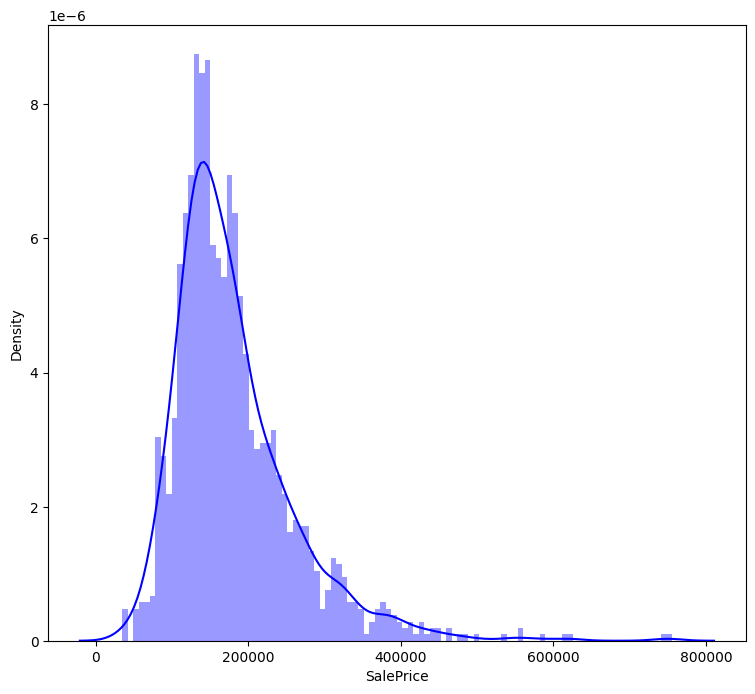

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

**Distribution of Numerical Features**

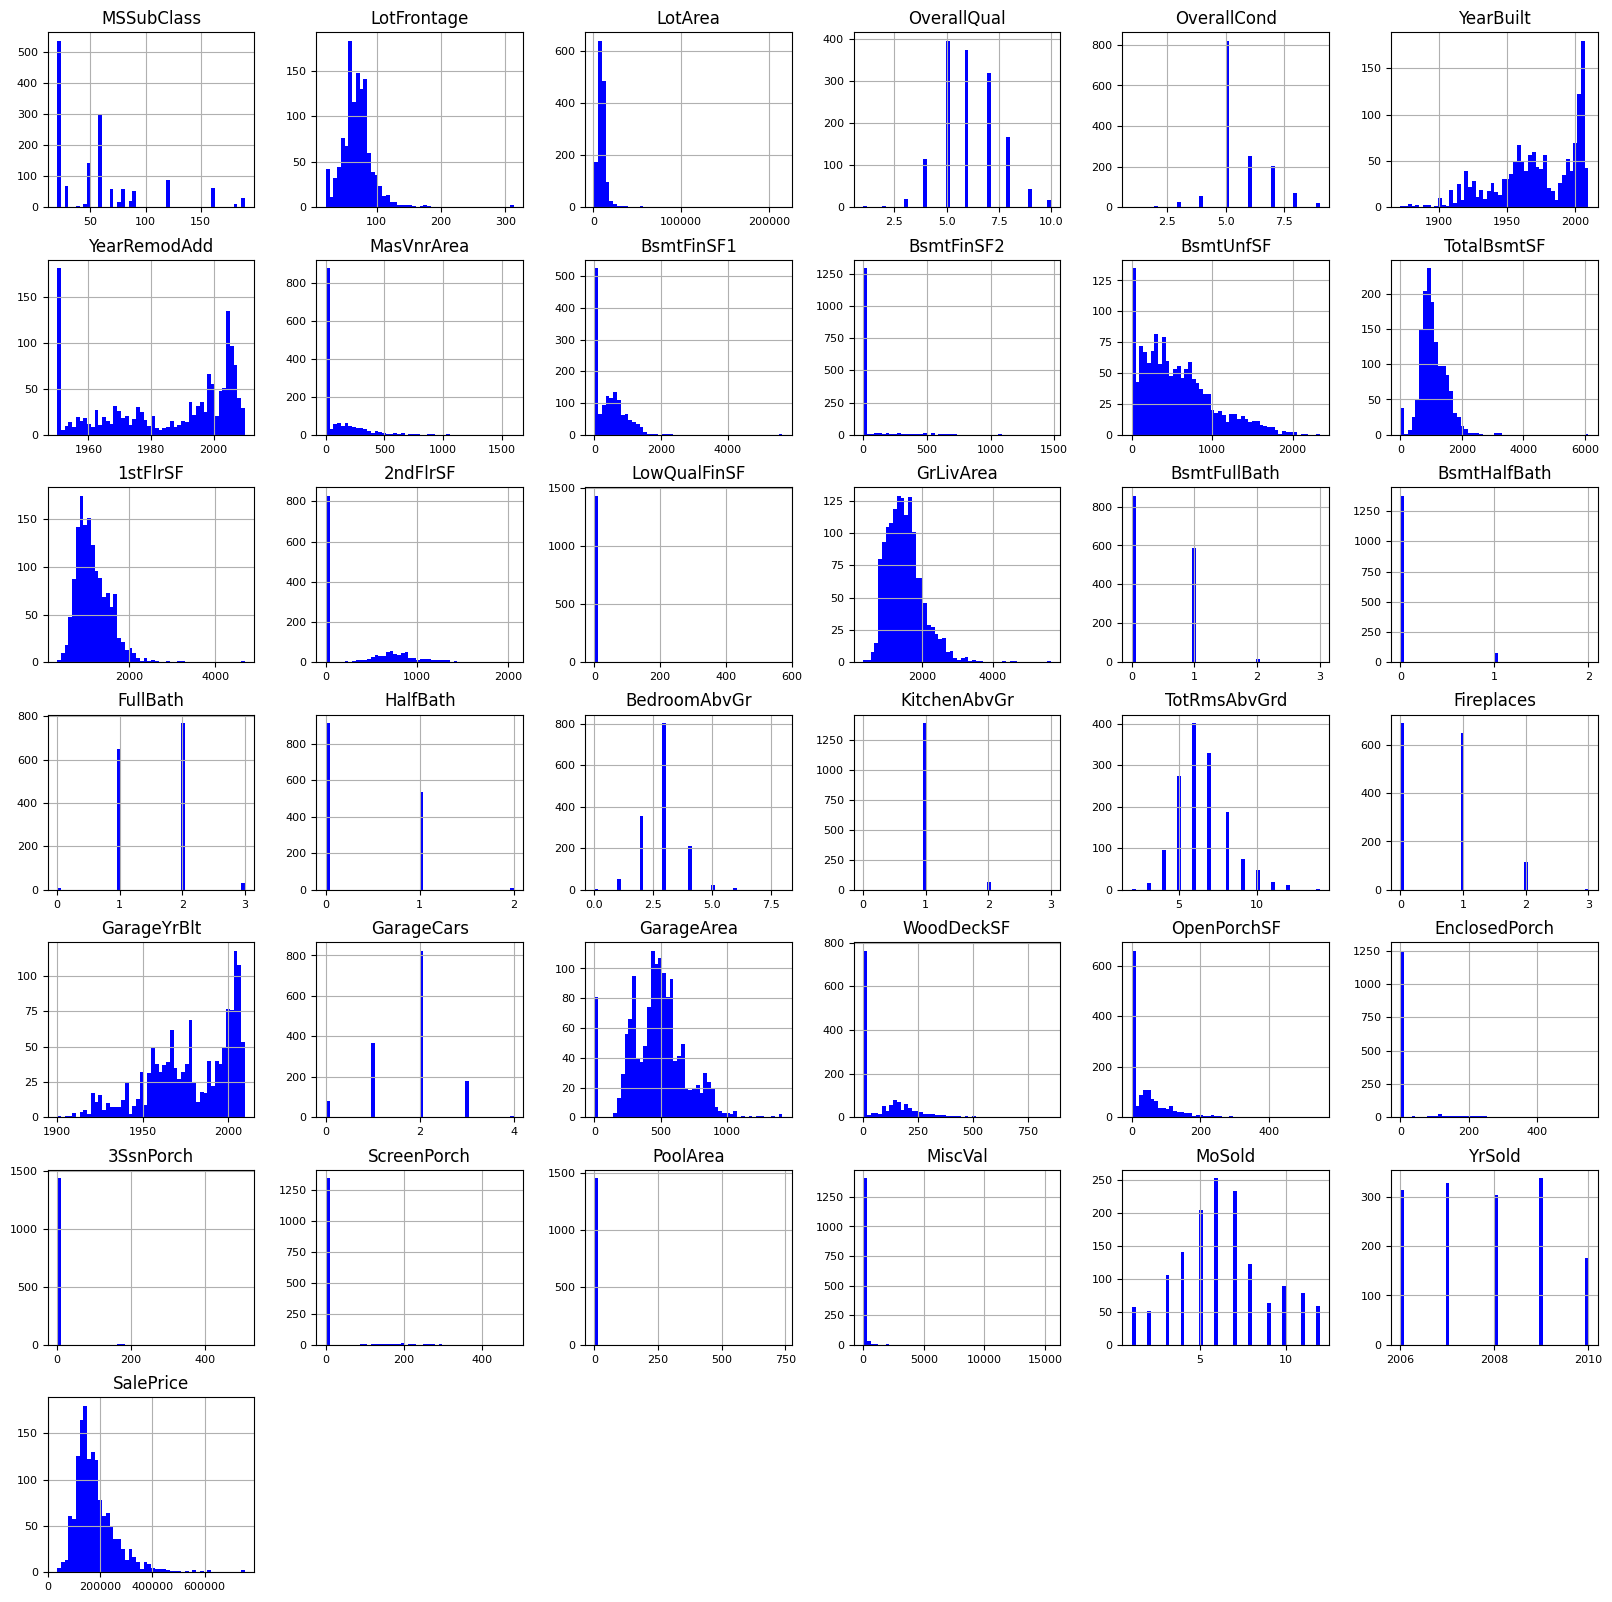

In [ ]:
list(set(df.dtypes.tolist()))

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(20, 20), color='b', bins=50, xlabelsize=8, ylabelsize=8);

# 3. Data Preproccesing

The dataset consists of numerical, categorical, and missing characteristics, which are natively supported by TF-DF without requiring any pre-processing.

## 3.1 Convert Dataframe into TensorFlow Dataset

**Splitting the dataset into test and training sets**

In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_df, test_df = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_df), len(test_df)))

1003 examples in training, 457 examples in testing.


The Random Forest Model is configured to train for classification tasks by default. However, since this is a regression problem, we will need to specify the type of task (tfdf.keras.Task.REGRESSION) as a parameter.

In [ ]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label, task = tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label, task = tfdf.keras.Task.REGRESSION)

# 4. Build Model

In [ ]:
# Getting all the models available in TensorFlow Decision Forests
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
# Build Model with evalutaion metric
model = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
model.compile(metrics=["mse"]) # Include a list of eval metrics

# Train a Random Forest model.
model.fit(train_ds)

# Summary of the model structure.
model.summary()

Use /tmp/tmp31c8ci7q as temporary training directory
Reading training dataset...
Training dataset read in 0:00:09.061696. Found 1003 examples.
Training model...
Model trained in 0:00:04.282455
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (79):
	1stFlrSF
	2ndFlrSF
	3SsnPorch
	Alley
	BedroomAbvGr
	BldgType
	BsmtCond
	BsmtExposure
	BsmtFinSF1
	BsmtFinSF2
	BsmtFinType1
	BsmtFinType2
	BsmtFullBath
	BsmtHalfBath
	BsmtQual
	BsmtUnfSF
	CentralAir
	Condition1
	Condition2
	Electrical
	EnclosedPorch
	ExterCond
	ExterQual
	Exterior1st
	Exterior2nd
	Fence
	FireplaceQu
	Fireplaces


In [ ]:
# Visualize model
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [ ]:
# Evaluate the model.
model.evaluate(test_ds)

1/1 [==============================] - 0s 441ms/step - loss: 0.0000e+00 - mse: 765684736.0000


[0.0, 765684736.0]

In [ ]:
# Export the model to a SavedModel.
model.save("project/model")

# 5. Evaluate Model

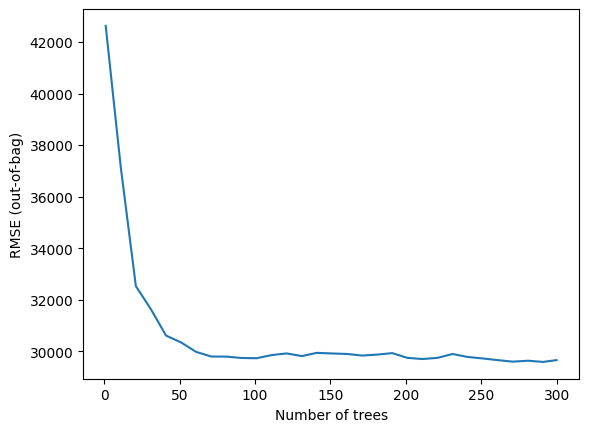

In [ ]:
logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1003, accuracy=None, loss=None, rmse=29666.7587938111, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = model.evaluate(x=test_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 913ms/step - loss: 0.0000e+00 - mse: 765684736.0000
loss: 0.0000
mse: 765684736.0000


## 5.1 Variable Importances
Available Variable Importances for Decision Trees:

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 SUM_SCORE


Display the important features for the Variable Importance NUM_AS_ROOT

In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 100.0),
 ("ExterQual" (4; #22), 76.0),
 ("Neighborhood" (4; #59), 42.0),
 ("GarageCars" (1; #32), 31.0),
 ("KitchenQual" (4; #44), 13.0),
 ("GrLivArea" (1; #38), 11.0),
 ("YearBuilt" (1; #76), 10.0),
 ("BsmtQual" (4; #14), 6.0),
 ("TotalBsmtSF" (1; #73), 5.0),
 ("GarageArea" (1; #31), 4.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("GarageFinish" (4; #34), 1.0)]

Plot the Variable Importances

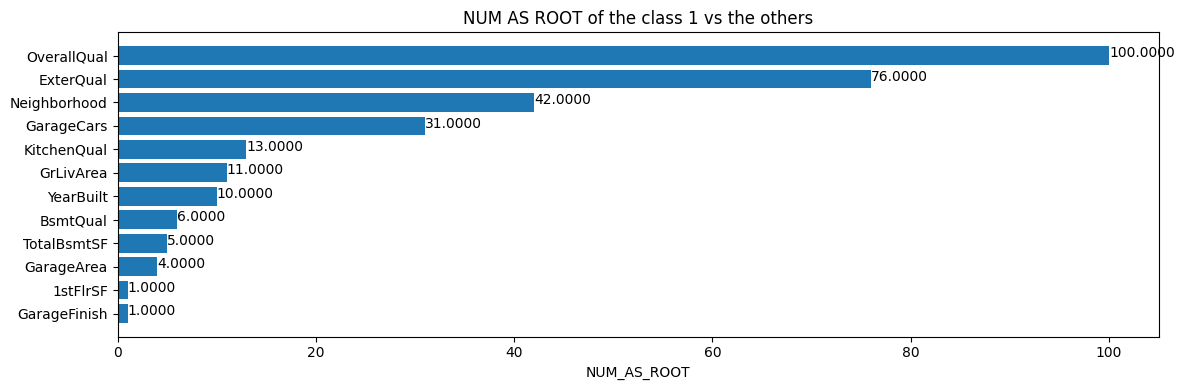

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

# 6. Predict on New Data

In [ ]:
test_df = pd.read_csv("test.csv")
ids = test_df.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_df,
    task = tfdf.keras.Task.REGRESSION)

preds = model.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 31ms/step


,Id,SalePrice
0,1461,124700.359375
1,1462,155224.062500
2,1463,181086.968750
3,1464,184473.078125
4,1465,198688.093750


In [ ]:
output.to_csv('submission.csv', index=False)